## Assignment 3

Problem Statement:

Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —


- To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

- To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

- To know the accuracy of the model, i.e. how well these variables can predict house prices.

In [1]:
# import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pylab as plt

from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA


from scipy.stats import pearsonr

%matplotlib inline

In [2]:
# load dataset
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## Data Analysis

In [3]:
# check the shape of the dataset
df.shape

(545, 13)

- Data has 14 features and 545 instances

In [4]:
# check if any feature has null values
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

- There are no null values in the data

In [5]:
# check the datatypes of the features
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

- Some of the features needs to be converted into their numerical representation

### Converted features into their numerical representation using Labelencoder
- instead of using the built in LabelEncoder, we used replace fucntion which acts in a similar way

In [6]:
# check the unique values for replacement
for column in ['mainroad','guestroom', 'basement', 'hotwaterheating', 'airconditioning',\
               'prefarea', 'furnishingstatus']:
    print(column,':',df[column].unique())

mainroad : ['yes' 'no']
guestroom : ['no' 'yes']
basement : ['no' 'yes']
hotwaterheating : ['no' 'yes']
airconditioning : ['yes' 'no']
prefarea : ['yes' 'no']
furnishingstatus : ['furnished' 'semi-furnished' 'unfurnished']


In [7]:
# replacing the unique values with numbers
for column in ['mainroad','guestroom', 'basement', 'hotwaterheating', 'airconditioning','prefarea']:
    df[column].replace(['yes','no'],[1,0], inplace = True)

df['furnishingstatus'].replace(['furnished','semi-furnished','unfurnished'],[1,0.5,0], inplace = True)

In [8]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1.0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1.0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0.5
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1.0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1.0


- All the features are converted into numerical form

### Preprocessing with MinMaxScaler

In [9]:
# convert all the features in range [0,1] using MinMaxScaler for better visualization
for column in df.columns[1:]:
    df[column] = MinMaxScaler().fit_transform(df[column].values.reshape(-1, 1))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to floa

In [10]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,0.396564,0.6,0.333333,0.666667,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,1.0
1,12250000,0.502405,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,0.0,1.0
2,12250000,0.571134,0.4,0.333333,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,1.0,0.5
3,12215000,0.402062,0.6,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,1.0
4,11410000,0.396564,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,0.0,1.0


### Visual Analysis

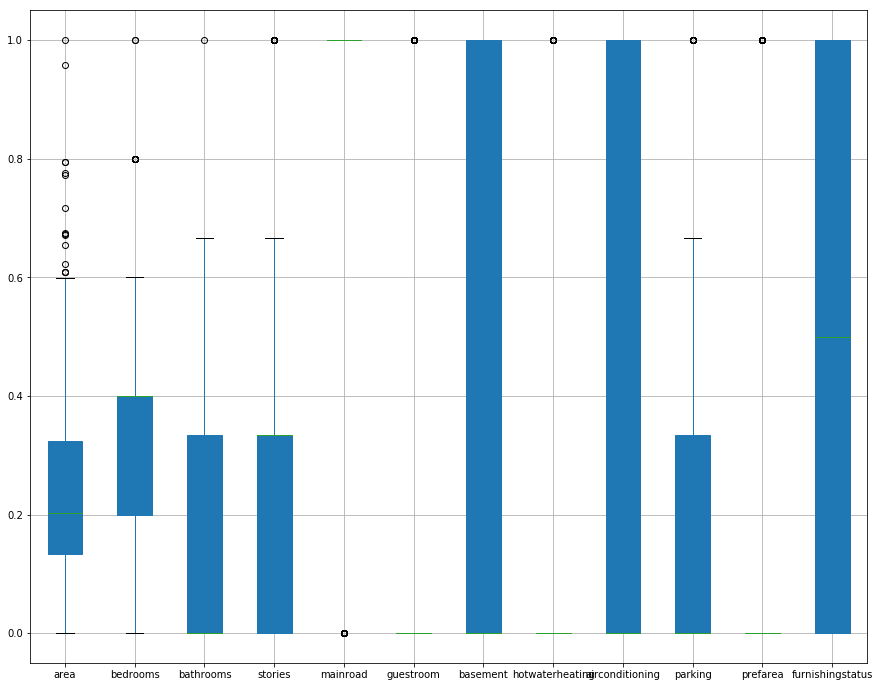

In [11]:
# Boxplot of all the features
plt.figure(figsize=(15,12))
df[df.columns[1:]].boxplot(patch_artist=True,vert=True)

- Many outlier in the data
- Data needs to be processed before training
- For this assignment we are not processing the data

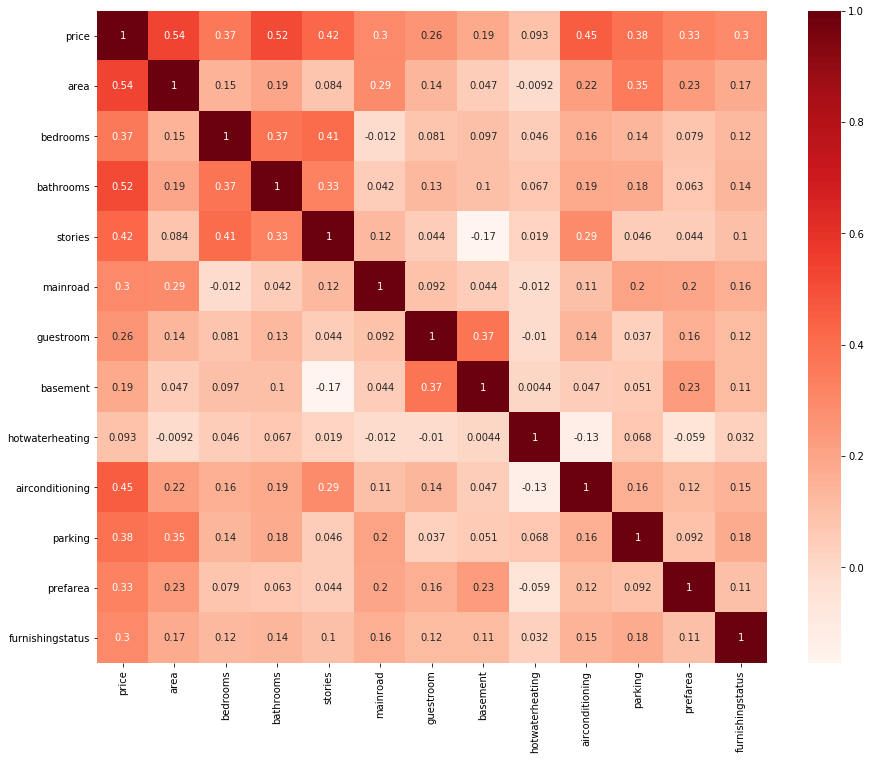

In [12]:
# heatmap for visualizing the correlation of features
plt.figure(figsize = (15,12))
sns.heatmap(df.corr(),annot=True,cmap=sns.color_palette("Reds", 100))

- Features such as **area**, **bathrooms** and **airconditioning** has high correlation with **price**
- While others such as **hotwaterheating** adn **basement** have low correlation with **price**

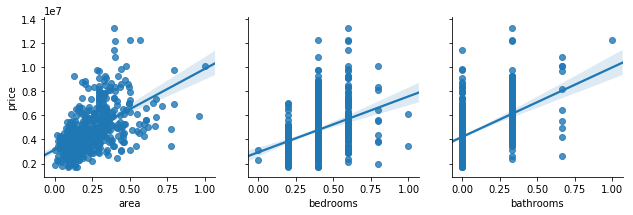

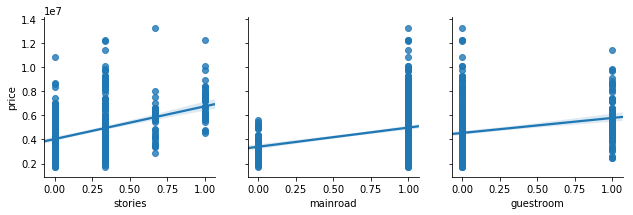

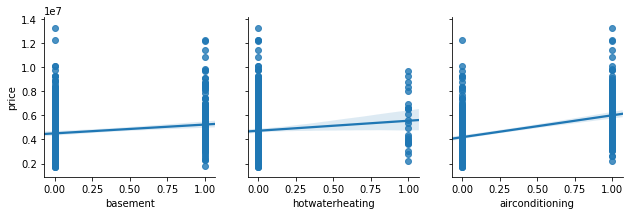

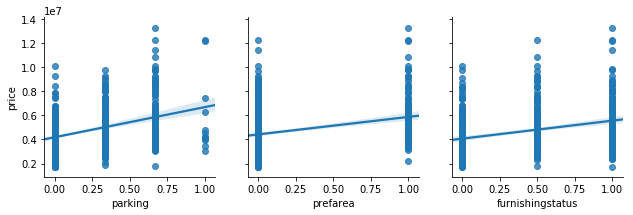

In [13]:
# regplot for each feature against the target **price**
for i in range(1,12,3):
    g=sns.pairplot(df, x_vars=df.columns[i:i+3], y_vars=["price"], height=3, aspect=1, kind="reg")

- All the features shows positive correlation with the taget **price**

- Lets find out the correlation coefficients of each feature with **price** and store it in ascending order
- There are many ways to select the best features such as Select From Model, Recurssive Feature Elemination,etc.
- We will use the correlation coefficient as the metrics to decide which features has most importance(even though not a good practice)

In [14]:
# corr_dict stores the feature_names and there correlation with price
corr_dict = list(zip(df.corr().price.index[1:],df.corr().price.values[1:]))
corr_dict.sort(key = lambda x: x[1],reverse=True)
pd.DataFrame(corr_dict,columns=['Column','Correlation with Price'])

,Column,Correlation with Price
0,area,0.535997
1,bathrooms,0.517545
2,airconditioning,0.452954
3,stories,0.420712
4,parking,0.384394
5,bedrooms,0.366494
6,prefarea,0.329777
7,furnishingstatus,0.304721
8,mainroad,0.296898
9,guestroom,0.255517


- We add these features one by one the feature columns and train-evaluate the linear regression model
- We used Hold Out Validation with 70-30 train-test split

In [15]:
# preparing the data for training by splitting the data into feature dataframe and target dataframe
X = df[df.columns[1:]]
y = df[df.columns[0]]

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
# model evaluation after adding each feature to the feature list
print('R2 scores after adding each feature to the feature list\n')

x_cols = []
for column,corr in corr_dict:
    
    x_cols.append(column)
    
    model_lr = LinearRegression()
    model_lr.fit(X_train[x_cols],y_train)
    
    print(column,'--',model_lr.score(X_test[x_cols],y_test))

print('The final R2 score of the model using all the features is',model_lr.score(X_test[x_cols],y_test))

R2 scores after adding each feature to the feature list

area -- 0.2583140345296
bathrooms -- 0.4235252099711745
airconditioning -- 0.5140196446790548
stories -- 0.5634074920800014
parking -- 0.5782028005804463
bedrooms -- 0.5826365295634275
prefarea -- 0.6199844540140873
furnishingstatus -- 0.627838959542221
mainroad -- 0.6342826278219708
guestroom -- 0.6361980558253236
basement -- 0.6304466266453166
hotwaterheating -- 0.6435419628959109
The final R2 score of the model using all the features is 0.6435419628959109


- The R2 score of the model increases with increasing number of features, indicating the features are playing important role in determing the taget **price
-  we can see after adding **basement** to the feature list, the performance of the model decreases
- Lets try removing the **basement** feature and check the model performnace

In [17]:
x_cols.remove('basement')

model_lr = LinearRegression()
model_lr.fit(X_train[x_cols],y_train)

print('\nThe final R2 score of the model removing the "basement" feature is',model_lr.score(X_test[x_cols],y_test))


The final R2 score of the model removing the "basement" feature is 0.6492060477419523


- As we can see, the model performs better without the **basement** feature
- R2 score increased from **0.6435** to **0.6492**
- Now lets check the model performance on train and test set separately

In [18]:
X_train = X_train[x_cols]
X_test = X_test[x_cols]
model_lr = LinearRegression()
model_lr.fit(X_train,y_train)

print(' R2 score on train set:',model_lr.score(X_train,y_train))
print(' R2 score on test set:',model_lr.score(X_test,y_test))

 R2 score on train set: 0.6806184446658956
 R2 score on test set: 0.6492060477419523


- As there is not much difference between the train and test scores, we can say that model is not **overfitting**

### Using PCA for visualizing the Ground truth and predicted values
- We used PCA to convert the entire data into single component
- This is not correct visualixation but gives a roughh idea how our model is performing
- We plot the PCA against true and predicted values of **price**
- Blue indicates true values and Red indicates predicted values

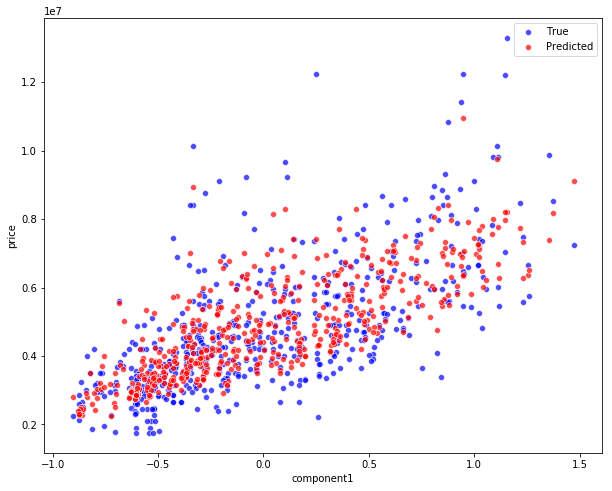

In [19]:
# Removing the basement feature from the feature dataset
X = X[x_cols]

# Using pca to convert 12 dimensinal data tp 1 dimensional data for plotting
pca = PCA(n_components=1)
df_pca = pd.DataFrame(pca.fit_transform(X),columns=['component1'])

#predict the taget values using the trianed model
y_pred = model_lr.predict(X)

# plotting PCA component vs target 'price'
plt.figure(figsize = (10,8))
sns.scatterplot(df_pca.component1,y,color='Blue',alpha=0.7,label = "True")
sns.scatterplot(df_pca.component1,y_pred,color = 'Red',alpha=0.7, label = "Predicted")

- Due to many outliers the model's performance is restricted

### Final model creation
- We train the model on the entire dataset, which can be used to to predict the **price** using the features

In [20]:
X = X[x_cols]
model_lr = LinearRegression()
model_lr.fit(X,y)

y_pred = model_lr.predict(X)
print(' R2 score on entire data set:',model_lr.score(X,y))
print(' R2 score on test set:',model_lr.score(X_test,y_test))

 R2 score on entire data set: 0.6737461728405498
 R2 score on test set: 0.6709637402370304


- After training the model on entire dataset, the R2 score increased to **0.6709** on testing set (which is subset of the traning set here)